**Unsupervised Machine Learning Algorithms**
* K-means Clustering
* Hierarchical Clustering
* DBSCAN

 PCA (Principal Component Analysis) Used for preprocessing


**PCA**
* Reduce the number of features (Dimensions)
* Keep max importand info
* Make data easier to visualize

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.DataFrame(
    {
        'Python':[78,85,92,67,88,76,90],
        'ML':    [82,79,91,69,84,77,93],
        'PwowerBI': [80,83,88,70,82,79,90]

    }
)

In [3]:
df

,Python,ML,PwowerBI
0,78,82,80
1,85,79,83
2,92,91,88
3,67,69,70
4,88,84,82
5,76,77,79
6,90,93,90


In [4]:
scaler=StandardScaler()
X_scalled=scaler.fit_transform(df)

In [6]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scalled)

In [7]:
pca_df=pd.DataFrame(X_pca,columns=['PC1','PC2'])

In [8]:
pca_df

,PC1,PC2
0,-0.470543,-0.346957
1,0.073536,0.488337
2,1.940309,0.024712
3,-3.168493,-0.072825
4,0.560838,0.358395
5,-1.081165,-0.089932
6,2.145517,-0.361729


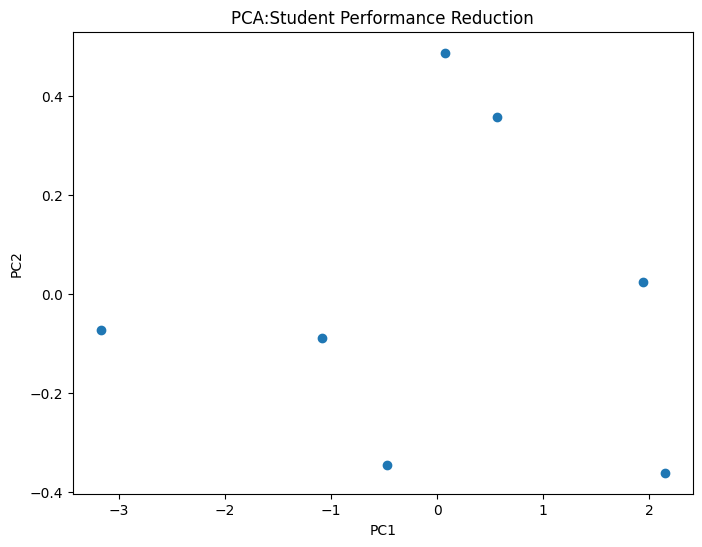

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'],pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA:Student Performance Reduction')
plt.show()

In [10]:
print('Varainace Ratio',pca.explained_variance_ratio_)

Varainace Ratio [0.95798412 0.03010235]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [13]:
df=pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.shape

(200, 5)

In [22]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [24]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [25]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
df.shape

(200, 5)

In [27]:
X=df[['Age','Annual Income (k$)',	'Spending Score (1-100)']]

In [28]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [29]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [30]:
pca_df=pd.DataFrame(X_pca,columns=['PC1','PC2'])

In [31]:
pca_df

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


In [32]:
kmeans=KMeans(n_clusters=4,random_state=42)
pca_df['Cluster']=kmeans.fit_predict(pca_df)

In [33]:
final_df=pd.concat([df,pca_df],axis=1)

In [34]:
final_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),PC1,PC2,Cluster
0,1,Male,19,15,39,-0.615720,-1.763481,2
1,2,Male,21,15,81,-1.665793,-1.820747,2
2,3,Female,20,16,6,0.337862,-1.674799,0
3,4,Female,23,16,77,-1.456573,-1.772430,2
4,5,Female,31,17,40,-0.038465,-1.662740,2
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,-1.093705,2.215577,1
196,197,Female,45,126,28,0.800448,2.540748,3
197,198,Male,32,126,74,-1.119709,2.445169,1
198,199,Male,32,137,18,0.395411,2.946665,3


In [36]:
centers=kmeans.cluster_centers_
print(centers)

[[ 0.97771498 -0.49877873]
 [-1.04671072  0.65699063]
 [-1.09453687 -1.11878664]
 [ 0.99540827  1.10926194]]


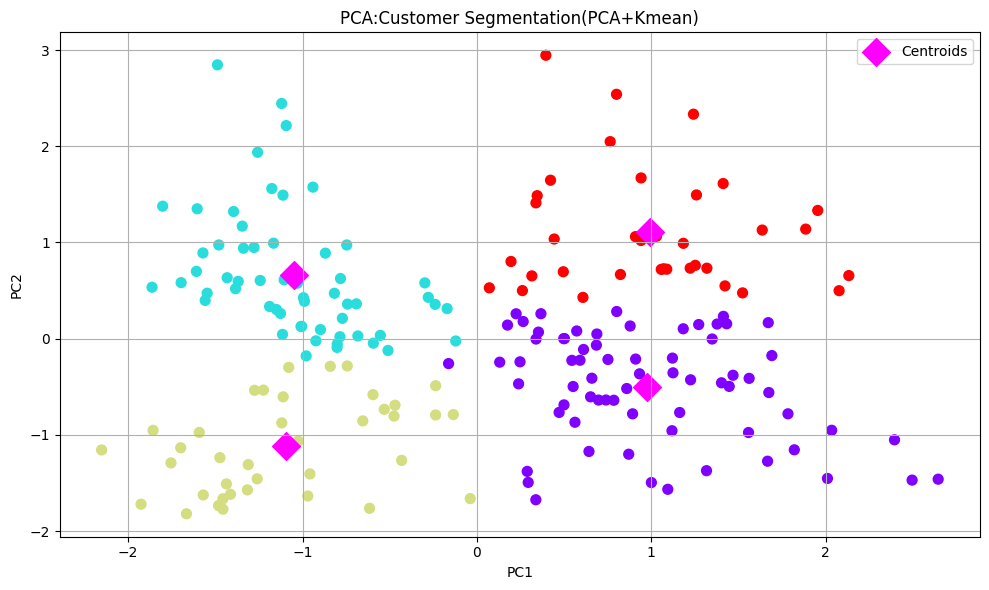

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(final_df['PC1'],final_df['PC2'],c=final_df['Cluster'],cmap='rainbow',s=50)
plt.scatter(centers[:,0],centers[:,1],c='magenta',s=200,marker='D',label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA:Customer Segmentation(PCA+Kmean)')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()